In [5]:
import os
from os.path import expanduser
import socket
import sys
import glob

# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
if running_system == systemLOCAL:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"Documents","projects", "pyfesom")
elif running_system[0:1] == "b" or running_system == systemHLRN:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"pyfesom")
else:
    print 'please configure your local machine : type socket.gethostname()'
print "working directory set to", wd_path
os.chdir(wd_path)
sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append("pyfesom") # add standard 's modules
#########################################

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pylab import *
import pyfesom as pf
from load_mesh_data_new import *
import numpy as np
import datetime as dt
from PiecewiseNorm import PiecewiseNorm
from netCDF4 import Dataset
import cmocean as cmaps
#from matplotlib.colors import ListedColormap


# Calculates total global NPP for each year and plots it

runid='Arc12'
first_year = 1980
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)

meshpath  = '/scratch/usr/hbkvsk12/hlrn3_work2/mesh/meshArc4.5/'
meshpath1 = '/scratch/usr/hbkvsk12/hlrn3_work2/mesh/meshArc20/'
mesh      = load_mesh(meshpath)
mesh1     = load_mesh(meshpath1)

ncfile      = meshpath+'Arc4.5.initial.mesh.diag.nc'
f           = Dataset(ncfile, 'r')
NodalAreaModel = f.variables['cluster_area'][:]
arcsurf_ind = np.nonzero((mesh.y2>66.))

ncfile      = meshpath1+'Arc20.initial.mesh.diag.nc'
f           = Dataset(ncfile, 'r')
NodalAreaSat = f.variables['cluster_area'][:]
arcsurf_ind1 = np.nonzero((mesh1.y2>66.))

ice_id='area'

IceArea = np.zeros(len(years))
IceCon = np.zeros(len(years))
IceArea1 = np.zeros(len(years))
IceCon1 = np.zeros(len(years))
for ind in range(0,len(years)):
    print years[ind]
    ncfile  = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/Oldfiles/'+runid+'.'+str(years[ind])+'.ice.mean.nc'
    f       = Dataset(ncfile, 'r') 
    if years[ind]<2000:
         h_sept  = f.variables[ice_id][8,:] #Sep
    else:
         h_sept  = f.variables[ice_id][122:136,:].mean(axis=0) #Sep
    
    arcsurf_ind = np.nonzero((mesh.y2>66.) & (h_sept>0.1))
    IceArea[ind]=np.sum(NodalAreaModel[arcsurf_ind])
    IceCon[ind]=np.mean(h_sept[mesh.y2>66.])
    
    
    ncfile  = '/scratch/usr/hbkvsk12/hlrn3_work2/data/Ice/SepSeaiceMeshArc20.nc'
    var_id  = 'SepSeaice'+str(years[ind])
    f       = Dataset(ncfile, 'r') 
    sat1    = np.squeeze(f.variables[var_id][0:mesh1.n2d]) #Sep
    arcsurf_ind = np.nonzero((mesh1.y2>66.) & (sat1>0.1))
    IceArea1[ind]=np.sum(NodalAreaSat[arcsurf_ind])
    IceCon1[ind]=np.nanmean(sat1[mesh1.y2>66.])

IceArea, IceArea1 = IceArea/1e6, IceArea1/1e6
############ Plot the ice ############
tot=np.mean(IceArea)
tot1=np.mean(IceArea1)

computer =  bfn1001
working directory set to /home/hbkoziel/pyfesom
The *usepickle = True* and the pickle file (*pickle_mesh*) exists.
 We load the mesh from it.
The *usepickle = True* and the pickle file (*pickle_mesh*) exists.
 We load the mesh from it.
1980


/home/hbkoziel/.conda/envs/pyfesom-docs/lib/python2.7/site-packages/ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in greater
/home/hbkoziel/.conda/envs/pyfesom-docs/lib/python2.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in greater


1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


In [6]:
nsidc=array([12.2,
12.43,
12.48,
12.3,
12.15,
12.22,
11.98,
12.49,
11.94,
12.24,
11.64,
12.11,
12.15,
11.87,
12.02,
11.44,
12.08,
11.74,
11.71,
11.78,
11.67,
11.46,
11.58,
11.6,
11.45,
11.16,
10.92,
11.22,
11.21,
11.32,
10.59,
10.75,
10.67,
11.36,
11.03,
10.88])
print nsidc.shape

(36,)


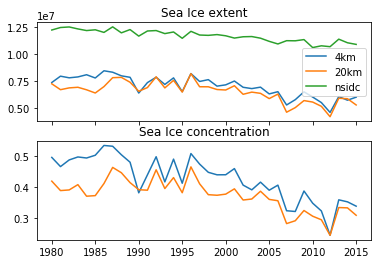

In [7]:
fig, axs = plt.subplots(2, sharex=True)
                        
                        
axs[0].plot(years,IceArea, label='4km')
axs[0].plot(years,IceArea1, label='20km')
axs[0].plot(years,nsidc*1e6, label='nsidc')
axs[0].legend(loc='best')
axs[0].set_title('Sea Ice extent')

axs[1].plot(years,IceCon)
axs[1].plot(years,IceCon1)
axs[1].set_title('Sea Ice concentration')

plt.show()

In [8]:
np.nanmean(sat1[mesh1.y2>66.])

0.30852333793647663

In [10]:
ncfile  = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/Oldfiles/'+runid+'.'+str(years[ind])+'.ice.mean.nc'
print ncfile

/scratch/usr/hbkvsk12/hlrn3_work2/results/Arc12/Oldfiles/Arc12.2015.ice.mean.nc
